In [3]:
import pandas as pd
data=pd.read_csv('Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

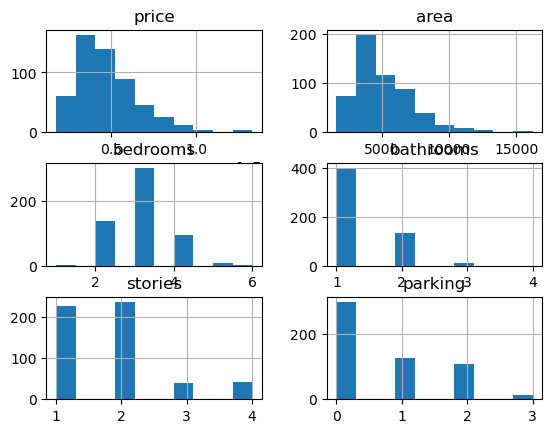

In [4]:
 data.hist()

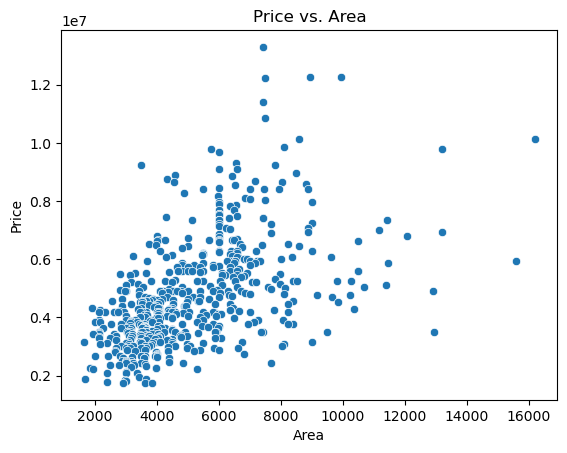

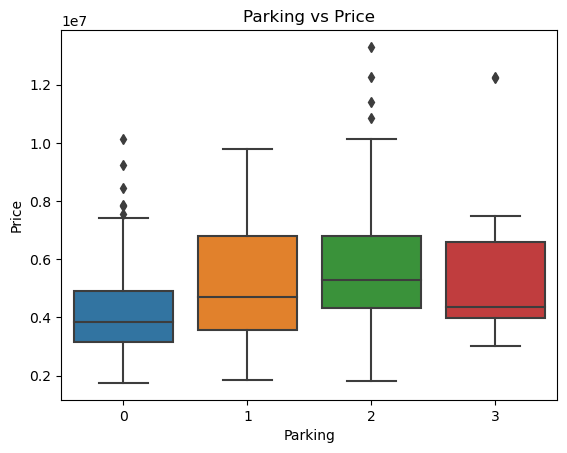

In [7]:
#BIVARIATE 
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()

sns.boxplot(x='parking', y='price', data=data)
plt.xlabel('Parking')
plt.ylabel('Price')
plt.title('Parking vs Price')
plt.show()


C:\Users\bandi\AppData\Local\Temp\ipykernel_22748\1432271903.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


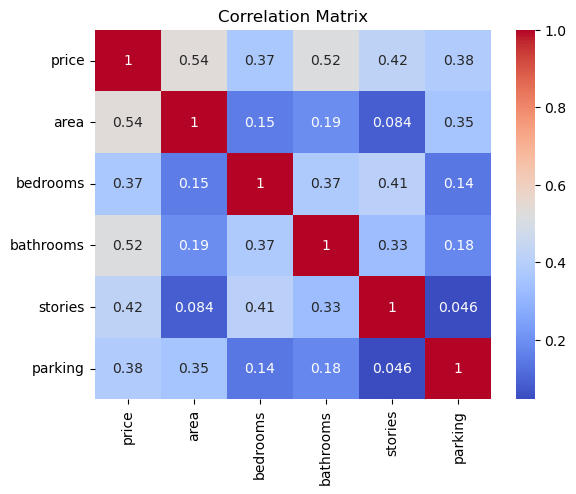

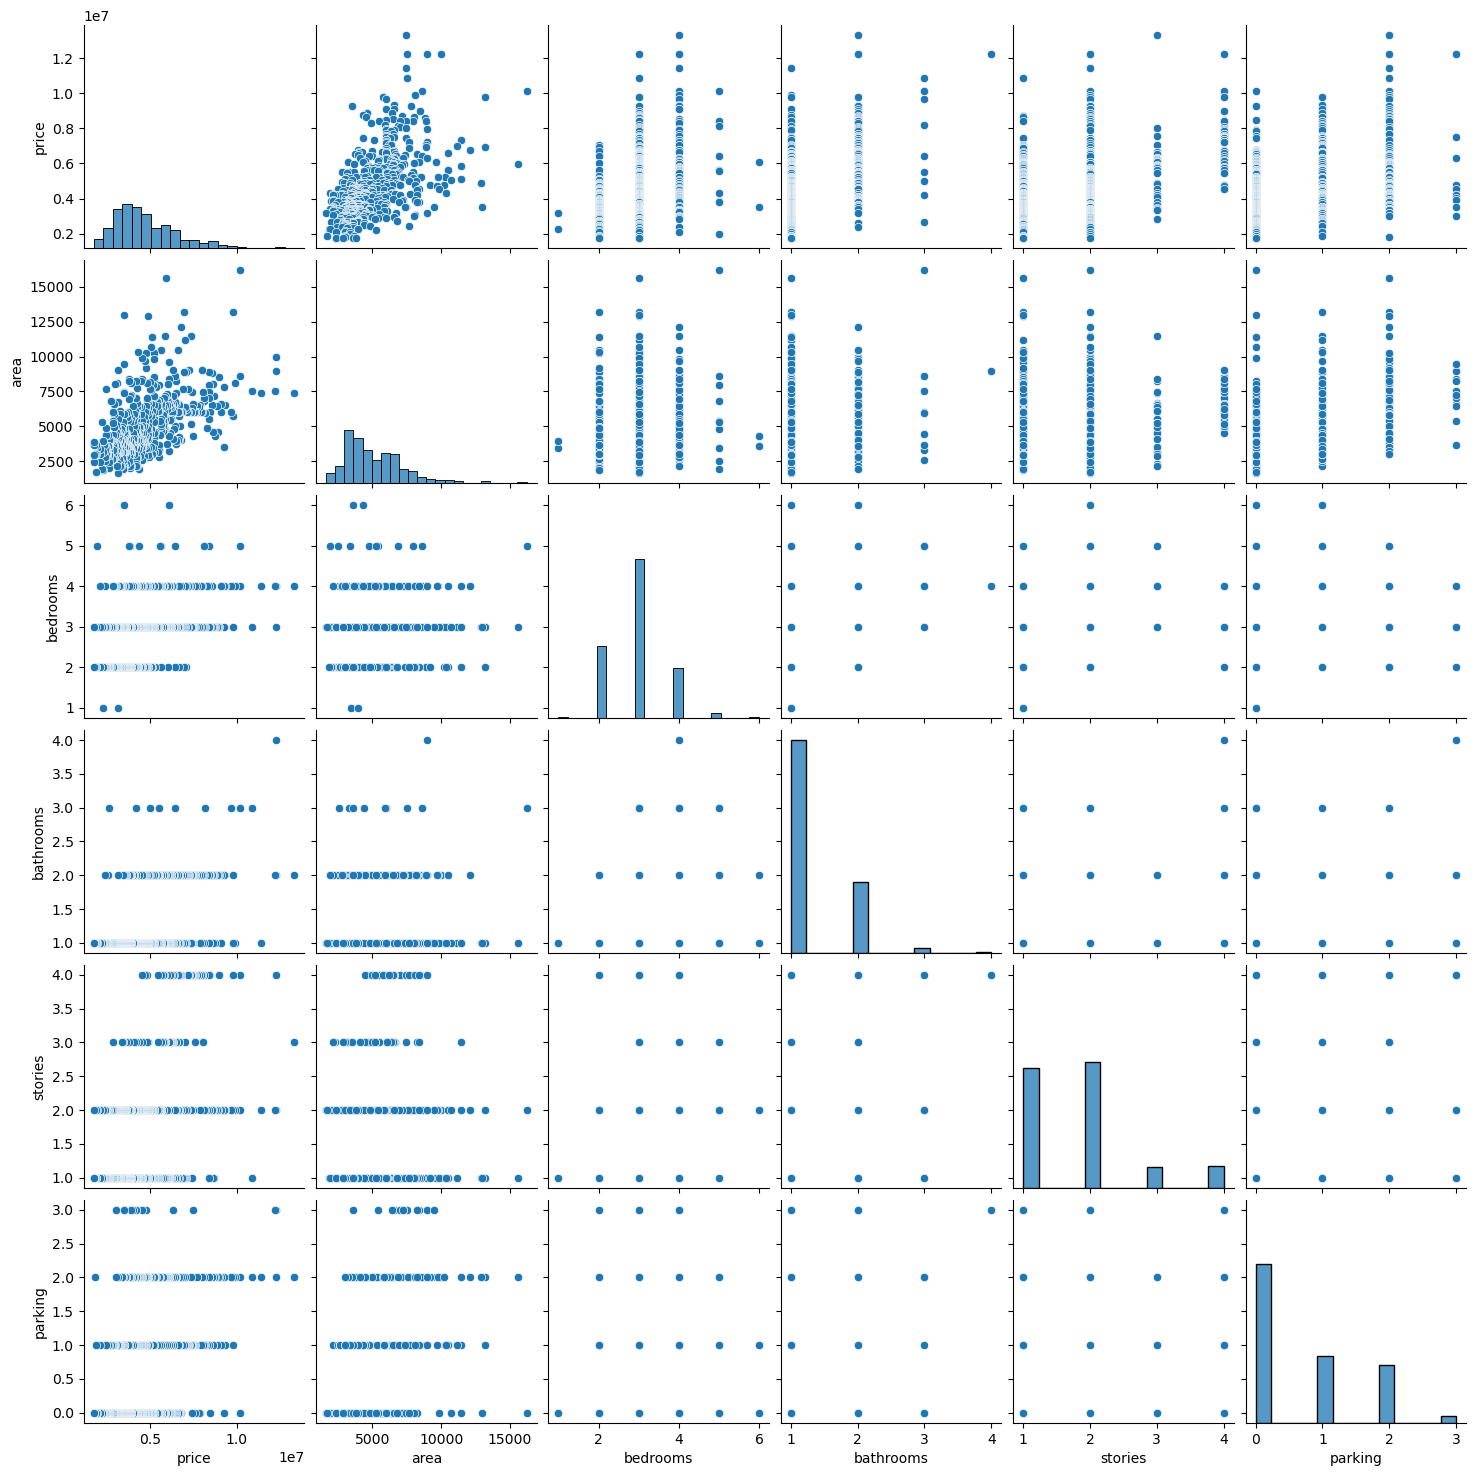

In [13]:
#MULTIVARIATE
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(data)
plt.show()

In [14]:
# Descriptive statistics on dataset
statistics = data.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [15]:
#Missing values
missing_values = data.isnull().sum()
print(missing_values)
data = data.dropna()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [16]:
#Outliers detection
import numpy as np
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']
for column in numerical_columns:
    outliers = detect_outliers_zscore(data[column])
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in price:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
Name: price, dtype: int64
Outliers in area:
7      16200
10     13200
66     13200
69     12090
125    15600
211    12900
403    12944
Name: area, dtype: int64
Outliers in bedrooms:
112    6
395    6
Name: bedrooms, dtype: int64
Outliers in bathrooms:
1      4
5      3
6      3
7      3
11     3
33     3
89     3
153    3
195    3
290    3
499    3
Name: bathrooms, dtype: int64
Outliers in stories:
Series([], Name: stories, dtype: int64)
Outliers in parking:
Series([], Name: parking, dtype: int64)


In [19]:
#Outliers changing 
def replace_outliers(data, column, method='median', threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]    
    if method == 'median':
        replacement_value = data[column].median()
    elif method == 'mean':
        replacement_value = data[column].mean()
    else:
        raise ValueError("Invalid replacement method. Choose 'median' or 'mean'.")  
    data.loc[z_scores > threshold, column] = replacement_value  
    return data

numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']
for column in numerical_columns:
    data = replace_outliers(data, column, method='median')
data.to_csv('housing_without_outliers.csv', index=False)
print(data)

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    4340000  7420         4          2        3      yes        no       no   
1    4340000  8960         4          1        4      yes        no       no   
2    4340000  9960         3          2        2      yes        no      yes   
3    4340000  7500         4          2        2      yes        no      yes   
4    4340000  7420         4          1        2      yes       yes      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  pa

In [23]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [24]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4340000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,4340000,8960,4,1,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,4340000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,4340000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,4340000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [29]:
# Splitting the data
X = data.drop('price', axis=1)  # Independent variables
X
y = data['price']  # Dependent variable
y

0      4340000
1      4340000
2      4340000
3      4340000
4      4340000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 545, dtype: int64

In [37]:
# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled

array([[ 1.33470625,  1.46476817,  1.76004101, ...,  1.4726183 ,
        -0.84488844, -0.6964292 ],
       [ 2.17446697,  1.46476817, -0.56816858, ...,  1.4726183 ,
        -0.84488844, -0.6964292 ],
       [ 2.71976613,  0.06424422,  1.76004101, ..., -0.67906259,
         1.18358821, -0.6964292 ],
       ...,
       [-0.73743057, -1.33627974, -0.56816858, ..., -0.67906259,
        -0.84488844,  1.43589615],
       [-1.12459298,  0.06424422, -0.56816858, ..., -0.67906259,
        -0.84488844, -0.6964292 ],
       [-0.61201177,  0.06424422, -0.56816858, ..., -0.67906259,
        -0.84488844,  1.43589615]])

In [41]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
X_train

array([[ 0.56038144,  0.06424422,  1.76004101, ...,  1.4726183 ,
        -0.84488844, -0.6964292 ],
       [ 1.21474044,  0.06424422,  1.76004101, ...,  1.4726183 ,
         1.18358821, -0.6964292 ],
       [-0.63055194, -1.33627974, -0.56816858, ...,  1.4726183 ,
        -0.84488844, -0.6964292 ],
       ...,
       [-0.25756731,  0.06424422,  1.76004101, ..., -0.67906259,
        -0.84488844, -0.6964292 ],
       [-0.50840492, -1.33627974, -0.56816858, ..., -0.67906259,
        -0.84488844,  1.43589615],
       [ 0.28773186,  0.06424422,  1.76004101, ...,  1.4726183 ,
         1.18358821, -0.6964292 ]])

In [40]:
X_test

array([[ 0.50585152,  1.46476817,  1.76004101, ..., -0.67906259,
        -0.84488844,  1.43589615],
       [ 0.83303102,  0.06424422,  1.76004101, ...,  1.4726183 ,
        -0.84488844, -0.6964292 ],
       [-0.50840492, -1.33627974, -0.56816858, ..., -0.67906259,
         1.18358821, -0.6964292 ],
       ...,
       [ 0.56038144,  1.46476817,  1.76004101, ...,  1.4726183 ,
         1.18358821, -0.6964292 ],
       [ 0.56038144,  0.06424422,  1.76004101, ...,  1.4726183 ,
         1.18358821, -0.6964292 ],
       [ 0.61491136,  0.06424422,  1.76004101, ..., -0.67906259,
        -0.84488844, -0.6964292 ]])

In [42]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [43]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [46]:
# Building the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [47]:
# Training 
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Testing
y_pred = model.predict(X_test)

In [49]:
# Performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)


RMSE: 1240660.1646020585
R-squared: 0.4826012633240784
